<a href="https://colab.research.google.com/github/arruenicol/challenge_alura_store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head(10)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.00,6900.00,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,192300.00,8400.00,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,209600.00,15900.00,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,757500.00,41000.00,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,335200.00,20200.00,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56
5,Bloques de construcción,Juguetes,24200.00,0.00,03/12/2020,Beatriz Morales,Cali,5,Cupón,1,3.44,-76.52
6,Muñeca bebé,Juguetes,44200.00,0.00,07/08/2021,Juan Fernandez,Bogotá,3,Nequi,1,4.61,-74.08
7,Lavavajillas,Electrodomésticos,1189700.00,63700.00,18/06/2021,Felipe Santos,Santa Marta,5,Tarjeta de crédito,10,11.24,-74.20
8,Lavadora de ropa,Electrodomésticos,1518200.00,79000.00,08/01/2022,Izabela de León,Bogotá,1,Tarjeta de crédito,5,4.61,-74.08
9,Carrito de control remoto,Juguetes,75200.00,5100.00,24/02/2020,Beatriz Morales,Bogotá,5,Nequi,1,4.61,-74.08


#1. Análisis de facturación



In [70]:
# Ingreso total de cada tienda
ingreso_tienda_1 = tienda["Precio"].sum()
ingreso_tienda_2 = tienda2["Precio"].sum()
ingreso_tienda_3 = tienda3["Precio"].sum()
ingreso_tienda_4 = tienda4["Precio"].sum()

print(f"El ingreso total de la tienda 1 es: ${ingreso_tienda_1}")
print(f"El ingreso total de la tienda 2 es: ${ingreso_tienda_2}")
print(f"El ingreso total de la tienda 3 es: ${ingreso_tienda_3}")
print(f"El ingreso total de la tienda 4 es: ${ingreso_tienda_4}")

El ingreso total de la tienda 1 es: $1150880400.0
El ingreso total de la tienda 2 es: $1116343500.0
El ingreso total de la tienda 3 es: $1098019600.0
El ingreso total de la tienda 4 es: $1038375700.0


In [71]:
# Dataframe de los ingresos
ingresos_totales = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [
        ingreso_tienda_1,
        ingreso_tienda_2,
        ingreso_tienda_3,
        ingreso_tienda_4
    ]
})

pd.set_option('display.float_format', '{:.0f}'.format)

print(ingresos_totales)

     Tienda  Ingreso Total
0  Tienda 1     1150880400
1  Tienda 2     1116343500
2  Tienda 3     1098019600
3  Tienda 4     1038375700


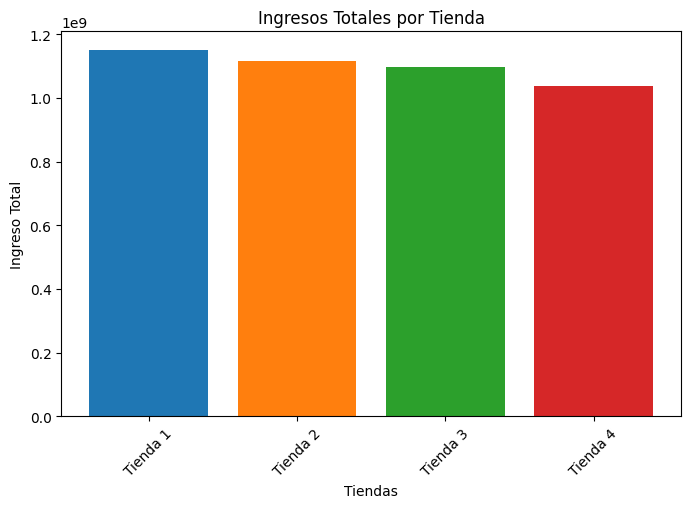

In [72]:
#Gráfica comparativa
plt.figure(figsize=(8,5))

plt.bar(
    ingresos_totales["Tienda"],
    ingresos_totales["Ingreso Total"],
    color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
)

plt.xlabel("Tiendas")
plt.ylabel("Ingreso Total")
plt.title("Ingresos Totales por Tienda")
plt.xticks(rotation=45)

plt.show()


# 2. Ventas por categoría

In [73]:
# 2. Análisis de ventas por categoría

# Obtener datos de cada tienda
categorias_tienda_1 = tienda["Categoría del Producto"].value_counts()
categorias_tienda_2 = tienda2["Categoría del Producto"].value_counts()
categorias_tienda_3 = tienda3["Categoría del Producto"].value_counts()
categorias_tienda_4 = tienda4["Categoría del Producto"].value_counts()

# Crear DataFrame comparativo con categorías como filas y tiendas como columnas
resumen_categorias = pd.DataFrame({
    'Tienda 1': categorias_tienda_1,
    'Tienda 2': categorias_tienda_2,
    'Tienda 3': categorias_tienda_3,
    'Tienda 4': categorias_tienda_4
}).fillna(0).astype(int)

print("\n=== CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA ===\n")
print(resumen_categorias)
print()


=== CANTIDAD DE PRODUCTOS VENDIDOS POR CATEGORÍA ===

                         Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Artículos para el hogar       171       181       177       201
Deportes y diversión          284       275       277       277
Electrodomésticos             312       305       278       254
Electrónicos                  448       422       451       451
Instrumentos musicales        182       224       177       170
Juguetes                      324       313       315       338
Libros                        173       197       185       187
Muebles                       465       442       499       480



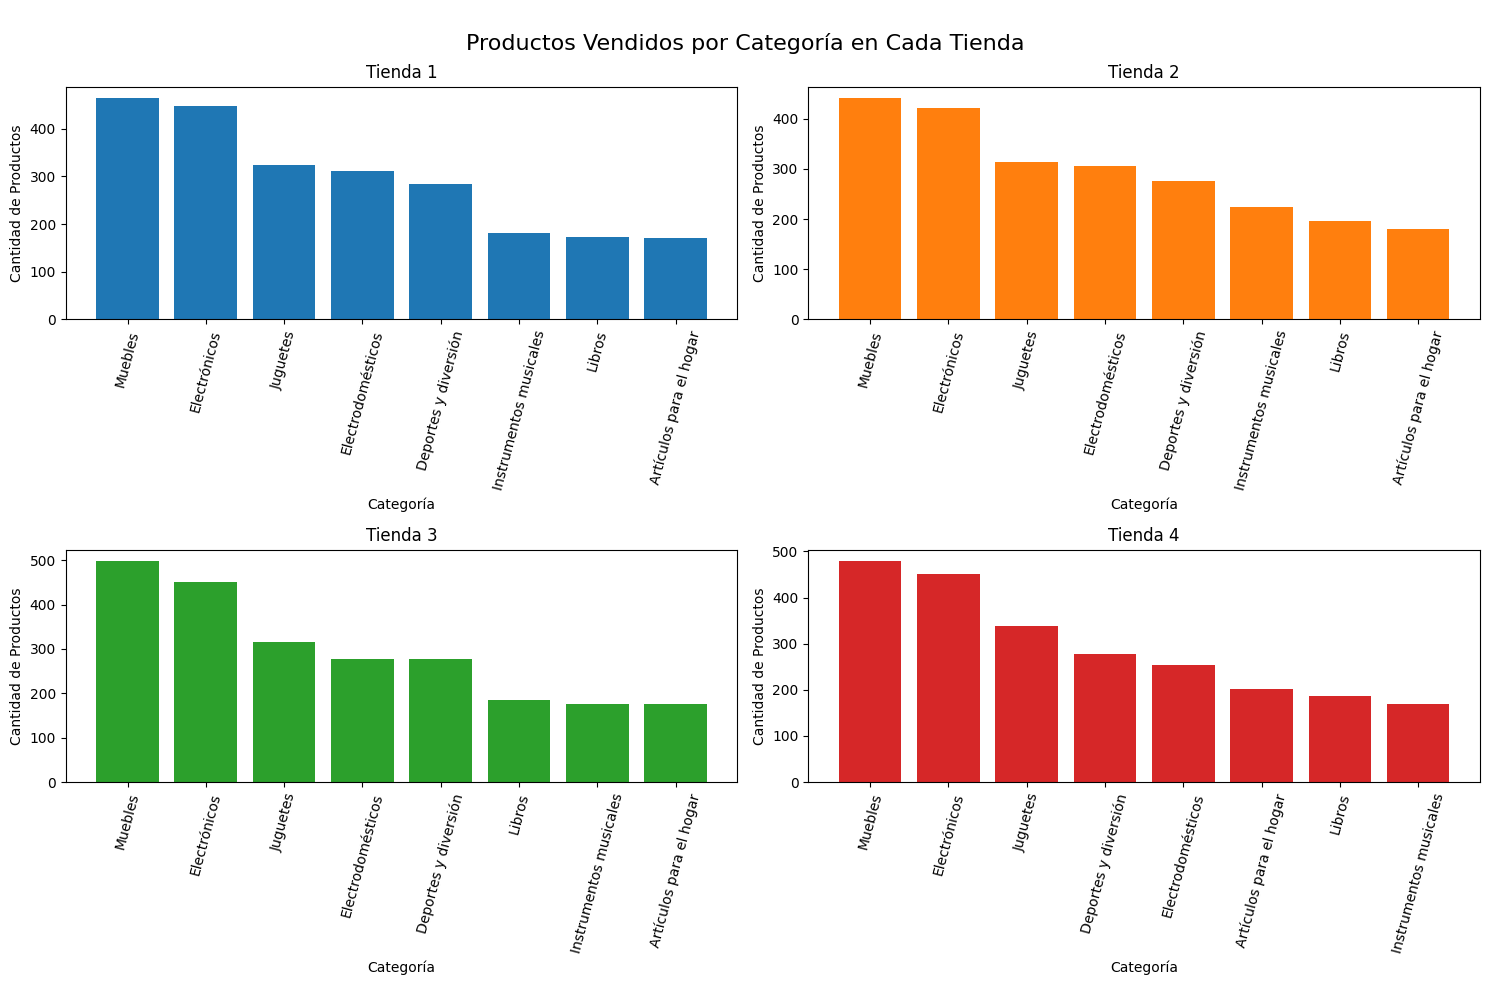


=== CATEGORÍA MÁS POPULAR POR TIENDA ===
Tienda 1: Muebles (465 productos)
Tienda 2: Muebles (442 productos)
Tienda 3: Muebles (499 productos)
Tienda 4: Muebles (480 productos)


In [74]:

# Categorías más vendidas por tienda
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('\nProductos Vendidos por Categoría en Cada Tienda', fontsize=16)

# Tienda 1
axes[0, 0].bar(categorias_tienda_1.index, categorias_tienda_1.values, color='#1f77b4')
axes[0, 0].set_title('Tienda 1')
axes[0, 0].set_xlabel('Categoría')
axes[0, 0].set_ylabel('Cantidad de Productos')
axes[0, 0].tick_params(axis='x', rotation=75)

# Tienda 2
axes[0, 1].bar(categorias_tienda_2.index, categorias_tienda_2.values, color='#ff7f0e')
axes[0, 1].set_title('Tienda 2')
axes[0, 1].set_xlabel('Categoría')
axes[0, 1].set_ylabel('Cantidad de Productos')
axes[0, 1].tick_params(axis='x', rotation=75)

# Tienda 3
axes[1, 0].bar(categorias_tienda_3.index, categorias_tienda_3.values, color='#2ca02c')
axes[1, 0].set_title('Tienda 3')
axes[1, 0].set_xlabel('Categoría')
axes[1, 0].set_ylabel('Cantidad de Productos')
axes[1, 0].tick_params(axis='x', rotation=75)

# Tienda 4
axes[1, 1].bar(categorias_tienda_4.index, categorias_tienda_4.values, color='#d62728')
axes[1, 1].set_title('Tienda 4')
axes[1, 1].set_xlabel('Categoría')
axes[1, 1].set_ylabel('Cantidad de Productos')
axes[1, 1].tick_params(axis='x', rotation=75)

plt.tight_layout()
plt.show()

# Categoría más popular de cada tienda
print("\n=== CATEGORÍA MÁS POPULAR POR TIENDA ===")
print(f"Tienda 1: {categorias_tienda_1.index[0]} ({categorias_tienda_1.iloc[0]} productos)")
print(f"Tienda 2: {categorias_tienda_2.index[0]} ({categorias_tienda_2.iloc[0]} productos)")
print(f"Tienda 3: {categorias_tienda_3.index[0]} ({categorias_tienda_3.iloc[0]} productos)")
print(f"Tienda 4: {categorias_tienda_4.index[0]} ({categorias_tienda_4.iloc[0]} productos)")

# 3. Calificación promedio de la tienda


In [75]:
# 3. Análisis de calificaciones promedio

# Calcular calificación promedio de cada tienda
calificacion_tienda_1 = tienda["Calificación"].mean()
calificacion_tienda_2 = tienda2["Calificación"].mean()
calificacion_tienda_3 = tienda3["Calificación"].mean()
calificacion_tienda_4 = tienda4["Calificación"].mean()

# Crear DataFrame con las calificaciones promedio
calificaciones_promedio = pd.DataFrame({
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [
        calificacion_tienda_1,
        calificacion_tienda_2,
        calificacion_tienda_3,
        calificacion_tienda_4
    ]
})

print("=== CALIFICACIÓN PROMEDIO POR TIENDA ===\n")
pd.set_option('display.float_format', '{:.2f}'.format)
print(calificaciones_promedio)
print()


=== CALIFICACIÓN PROMEDIO POR TIENDA ===

     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00



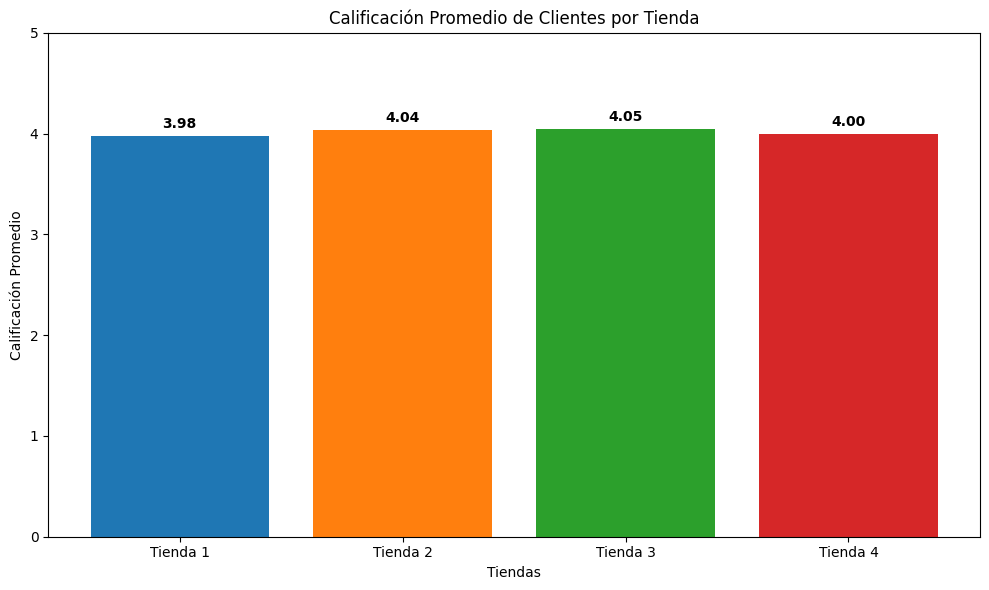

In [76]:

# Gráfico de barras con las calificaciones promedio
plt.figure(figsize=(10, 6))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
bars = plt.bar(
    calificaciones_promedio["Tienda"],
    calificaciones_promedio["Calificación Promedio"],
    color=colors
)

plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio de Clientes por Tienda")
plt.ylim(0, 5)

# Añadir etiquetas con los valores
for bar, valor in zip(bars, calificaciones_promedio["Calificación Promedio"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{valor:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

In [77]:
# Análisis de satisfacción del cliente
print("\n=== SATISFACCIÓN DEL CLIENTE ===")

# Obtener las filas con mejor y peor calificación directamente
mejor = calificaciones_promedio.loc[calificaciones_promedio["Calificación Promedio"].idxmax()]
peor = calificaciones_promedio.loc[calificaciones_promedio["Calificación Promedio"].idxmin()]

# Mostrar resultados
print(f"🏆 Mejor calificación: {mejor['Tienda']} ({mejor['Calificación Promedio']:.2f})")
print(f"📉 Peor calificación: {peor['Tienda']} ({peor['Calificación Promedio']:.2f})")



=== SATISFACCIÓN DEL CLIENTE ===
🏆 Mejor calificación: Tienda 3 (4.05)
📉 Peor calificación: Tienda 1 (3.98)


# 4. Productos más y menos vendidos




Tienda 1 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $97,902,200.00
  Refrigerador - Ingresos: $112,143,300.00
  TV LED UHD 4K - Ingresos: $142,150,200.00

Tienda 1 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $652,800.00
  Dinosaurio Rex - Ingresos: $688,900.00
  Cubo mágico 8x8 - Ingresos: $696,900.00


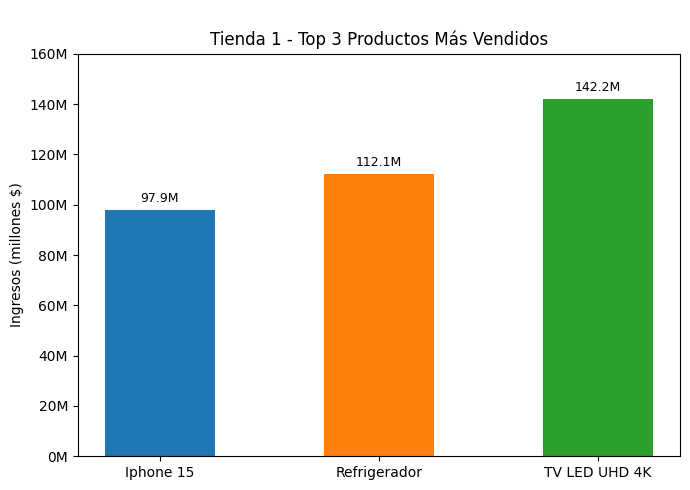




Tienda 2 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $113,225,800.00
  Refrigerador - Ingresos: $97,632,500.00
  TV LED UHD 4K - Ingresos: $103,375,000.00

Tienda 2 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $643,600.00
  Dinosaurio Rex - Ingresos: $770,300.00
  Cuerda para saltar - Ingresos: $856,900.00


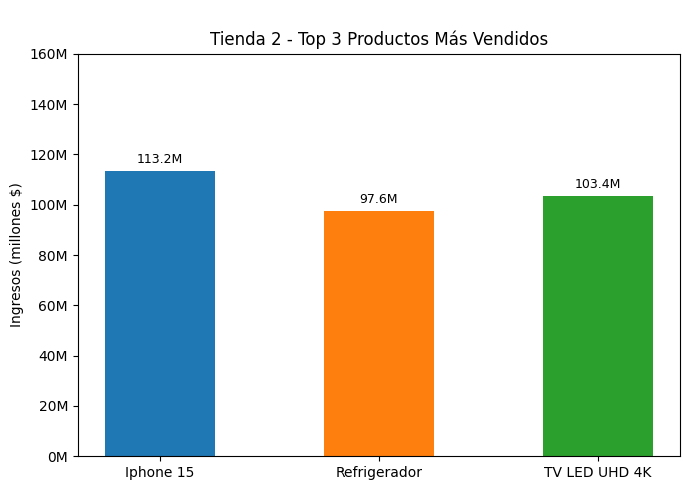




Tienda 3 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $93,225,700.00
  Refrigerador - Ingresos: $99,889,700.00
  TV LED UHD 4K - Ingresos: $96,669,100.00

Tienda 3 - TOP 3 productos que MENOS dinero generaron:
  Cubo mágico 8x8 - Ingresos: $640,400.00
  Dinosaurio Rex - Ingresos: $795,600.00
  Cuerda para saltar - Ingresos: $853,800.00


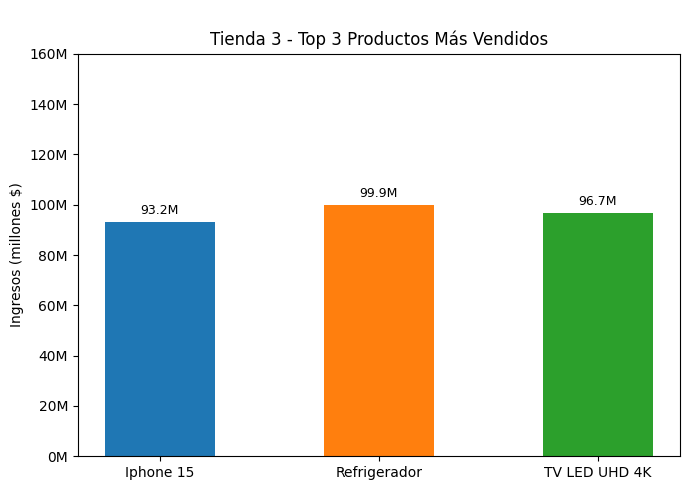




Tienda 4 - TOP 3 productos que MÁS dinero generaron:
  Iphone 15 - Ingresos: $96,697,500.00
  Smart TV - Ingresos: $82,790,400.00
  TV LED UHD 4K - Ingresos: $90,295,300.00

Tienda 4 - TOP 3 productos que MENOS dinero generaron:
  Cuerda para saltar - Ingresos: $704,800.00
  Cubo mágico 8x8 - Ingresos: $748,400.00
  Dinosaurio Rex - Ingresos: $858,100.00


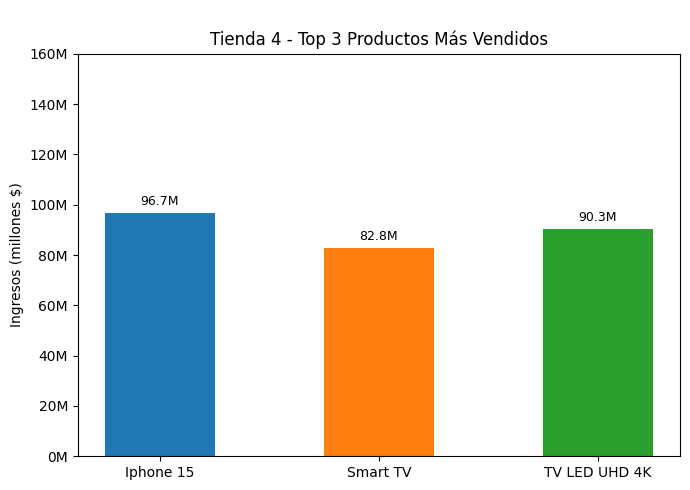

In [78]:
import matplotlib.ticker as mtick

urls = [url, url2, url3, url4]

# Leer todos los CSVs y agregar columna 'Tienda'
df_total = pd.concat(
    [pd.read_csv(url).assign(Tienda=f"Tienda {i+1}") for i, url in enumerate(urls)],
    ignore_index=True
)

# Asegurar tipos correctos
df_total['Precio'] = df_total['Precio'].astype(float)
df_total['Cantidad de cuotas'] = df_total['Cantidad de cuotas'].astype(int)
df_total['Ingreso'] = df_total['Precio']

# Agrupar por Tienda y Producto sumando ingresos
ventas = df_total.groupby(['Tienda', 'Producto'])['Ingreso'].sum().reset_index()

def graficar_top3_por_tienda(tienda):
    data = ventas[ventas['Tienda'] == tienda]
    top_mas = data.sort_values(by='Ingreso', ascending=False).head(3)
    top_menos = data.sort_values(by='Ingreso', ascending=True).head(3)

    top_mas = top_mas.sort_values(by='Producto')


    # Imprimir texto
    print(f"\n\n\n{tienda} - TOP 3 productos que MÁS dinero generaron:")
    for _, fila in top_mas.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:,.2f}")

    print(f"\n{tienda} - TOP 3 productos que MENOS dinero generaron:")
    for _, fila in top_menos.iterrows():
        print(f"  {fila['Producto']} - Ingresos: ${fila['Ingreso']:,.2f}")

    # Colores diferentes para las barras
    colores = ['#1f77b4', '#ff7f0e', '#2ca02c']  # azul, naranja, verde

    # Gráfico
    plt.figure(figsize=(7,5))
    barras = plt.bar(top_mas['Producto'], top_mas['Ingreso'] / 1_000_000, color=colores, width=0.5)
    plt.title(f"\n{tienda} - Top 3 Productos Más Vendidos")
    plt.ylabel("Ingresos (millones $)")
    plt.ylim(0, 160)  # Límite máximo en el eje Y
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x:.0f}M'))

    # Añadir etiquetas de ingresos encima de cada barra
    for barra in barras:
        alto = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, alto + 2, f'{alto:.1f}M', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

for tienda in ventas['Tienda'].unique():
    graficar_top3_por_tienda(tienda)


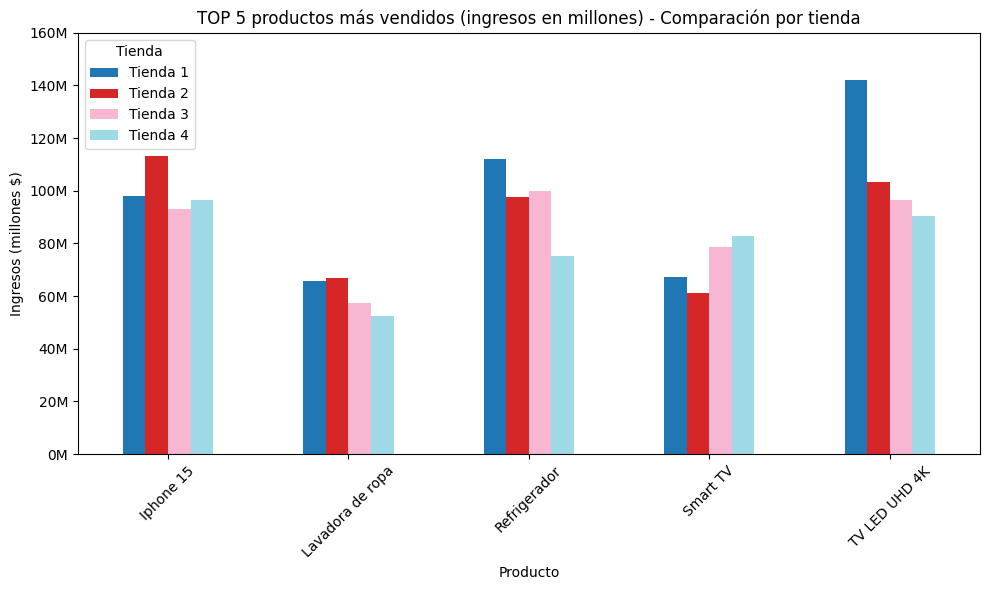

In [79]:
top_n = 5
top_productos_global = ventas.groupby('Producto')['Ingreso'].sum().nlargest(top_n).index
data_top = ventas[ventas['Producto'].isin(top_productos_global)]


# Asumiendo que ya tienes pivot creado como antes (productos x tiendas)
pivot = data_top.pivot(index='Producto', columns='Tienda', values='Ingreso').fillna(0)
pivot = pivot / 1_000_000  # Convertir a millones

ax = pivot.plot(kind='bar', stacked=False, figsize=(10,6), colormap='tab20')

plt.title("TOP 5 productos más vendidos (ingresos en millones) - Comparación por tienda")
plt.ylabel("Ingresos (millones $)")
plt.xticks(rotation=45)

ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x)}M'))

max_val = pivot.values.max()
limite_superior = (int(max_val / 20) + 1) * 20
ax.set_ylim(0, limite_superior)

plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [80]:
# Asegurar que 'Costo de envío' sea float
df_total['Costo de envío'] = df_total['Costo de envío'].astype(float)

# Calcular envío promedio por tienda
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean()

# Mostrar resultados
print("\nEnvío promedio por tienda:")
for tienda, promedio in envio_promedio.items():
    print(f"{tienda}: ${promedio:.2f}")



Envío promedio por tienda:
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46


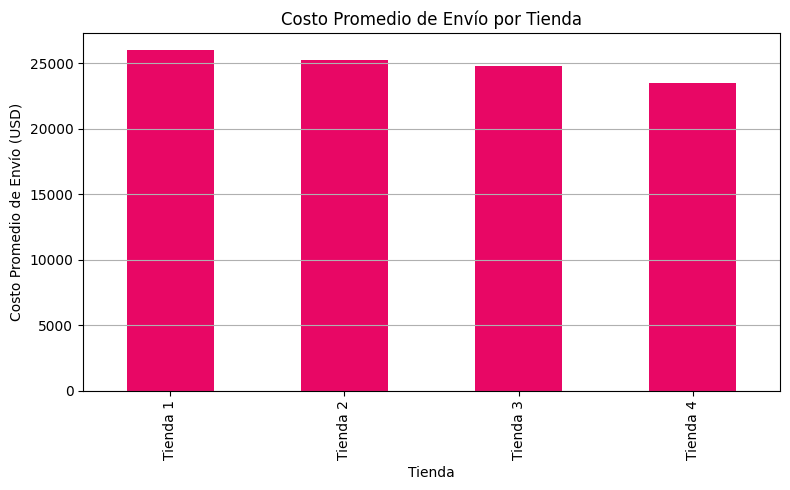

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
envio_promedio.plot(kind='bar', color='#e80765')
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Costo Promedio de Envío (USD)')
plt.xlabel('Tienda')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# **Informe y conclusiones**

Este informe tiene como propósito brindar al Sr. Juan una recomendación fundamentada sobre cuál de sus cuatro tiendas debería vender para obtener capital de inversión para su nuevo emprendimiento. El análisis se basa en múltiples variables críticas del negocio: ingresos totales, comportamiento de categorías de productos, satisfacción del cliente medida a través de calificaciones, rendimiento de productos específicos y costos operativos de envío. Esta evaluación integral permitirá identificar cuál tienda presenta el menor impacto negativo en el portafolio general del Sr. Juan tras su venta.

## **Análisis de Ingresos Totales**

El análisis de facturación revela diferencias significativas entre las tiendas. La Tienda 1 lidera con 1,150,880,400, seguida muy de cerca por la Tienda 2 con 1,116,343,500 y la Tienda 3 con $1,098,019,600. La Tienda 4 presenta una notable diferencia, generando 1,038,375,700, lo que representa aproximadamente 112 millones menos que la tienda líder.

Esta brecha de ingresos no es marginal y sugiere que la Tienda 4 tiene un desempeño comercial inferior al resto. La diferencia representa cerca del 10% menos de ingresos comparado con las tiendas de mejor rendimiento, lo que indica una menor capacidad de generación de valor económico.


## **Comportamiento de Categorías de Productos**

El análisis por categorías muestra patrones consistentes en todas las tiendas, siendo "Muebles" la categoría dominante universalmente. Sin embargo, se observan variaciones importantes en el desempeño de otras categorías clave. La Tienda 1 destaca en "Electrodomésticos" con 312 productos vendidos, mientras que la Tienda 4 presenta el rendimiento más bajo en esta categoría con solo 254 productos.

En "Electrónicos", categoría de alto valor, las Tiendas 3 y 4 empatan con 451 productos cada una, superando a las Tiendas 1 y 2. No obstante, este mejor desempeño en cantidad no se traduce proporcionalmente en ingresos para la Tienda 4, sugiriendo posibles problemas en la estrategia de precios o mix de productos.

La categoría "Juguetes" muestra un rendimiento superior en la Tienda 4 (338 productos), lo que representa una fortaleza relativa, aunque insuficiente para compensar las debilidades en otras áreas críticas.


## **Satisfacción del Cliente**

Los datos de calificación revelan diferencias sutiles pero importantes en la experiencia del cliente. La Tienda 3 lidera con una calificación promedio de 4.05, estableciendo el estándar de excelencia en servicio al cliente. La Tienda 2 y 4 mantienen calificaciones sólidas de 4.04 y 4.00 respectivamente.

La Tienda 1 presenta la calificación más baja con 3.98, lo que, aunque dentro de rangos aceptables, indica oportunidades de mejora en la experiencia del cliente. Esta diferencia, aunque aparentemente menor, puede tener impactos significativos en la fidelización y recomendación de clientes a largo plazo.


## **Análisis de Productos Estrella y Problemáticos**

El análisis de productos individuales revela patrones interesantes. Los productos de mayor generación de ingresos (iPhone 15, Refrigerador, TV LED UHD 4K) están presentes en todas las tiendas, pero con rendimientos variables. La Tienda 1 genera $142,150,200 con TV LED UHD 4K, superando significativamente a las demás tiendas en este producto específico.

Los productos de menor rendimiento también muestran consistencia entre tiendas, concentrándose en artículos como "Cuerda para saltar", "Dinosaurio Rex" y "Cubo mágico 8x8". Estos productos representan oportunidades de optimización de inventario o descontinuación en todas las tiendas.


## **Costos Operativos de Envío**

El análisis de costos de envío presenta uno de los aspectos más favorables para la Tienda 4, que registra el costo promedio más bajo con $23,459.46. En contraste, la Tienda 1 presenta los costos más elevados con $26,018.61. Esta diferencia de aproximadamente $2,559 por envío representa una ventaja operativa significativa para la Tienda 4.

La progresión de costos (Tienda 1: $26,018.61, Tienda 2: $25,216.24, Tienda 3: $24,805.68, Tienda 4: $23,459.46) sugiere posibles diferencias en eficiencia logística, ubicación geográfica o negociaciones con proveedores de transporte.



## **Evaluación Integral y Consideraciones Estratégicas**

Al analizar todas las variables en conjunto, emerge un panorama complejo que requiere una evaluación ponderada. La Tienda 4, a pesar de sus menores ingresos totales, presenta ventajas competitivas en costos operativos y mantiene una calificación de cliente sólida. Sin embargo, su capacidad reducida de generación de ingresos representa una limitación fundamental.

La Tienda 1, líder en ingresos, presenta desafíos en satisfacción del cliente y costos operativos elevados. La Tienda 3 destaca en experiencia del cliente pero no lidera en ingresos. La Tienda 2 mantiene un perfil equilibrado sin destacar significativamente en ninguna dimensión.



## **Conclusión y Recomendación**

Tras el análisis exhaustivo de todas las variables, la recomendación es **vender la Tienda 4**. Esta decisión se fundamenta en los siguientes argumentos críticos:

**Razones principales:**
1. **Menor impacto en ingresos totales**: Con $112 millones menos en facturación que la tienda líder, su venta genera el menor impacto negativo en el flujo de ingresos del portafolio.

2. **Menor potencial de crecimiento**: Los datos sugieren limitaciones estructurales en la capacidad de generación de valor de esta tienda.

3. **Optimización del portafolio**: Eliminar el eslabón más débil permite concentrar recursos y atención en las tres tiendas de mejor rendimiento.

**Consideraciones adicionales:**
- Aunque la Tienda 4 presenta ventajas en costos de envío, estas eficiencias podrían replicarse en las tiendas restantes mediante mejores prácticas operativas.
- Su calificación de cliente aceptable (4.00) sugiere que no hay problemas graves de reputación que afecten negativamente una eventual venta.

Esta recomendación maximiza la retención de capacidad de generación de ingresos mientras libera capital para el nuevo emprendimiento del Sr. Juan, posicionándolo estratégicamente para el crecimiento futuro con un portafolio optimizado de tres tiendas de alto rendimiento.